In [1]:
import torch
import random
import numpy as np
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets
from tqdm import tqdm

In [3]:
CIFAR_train = torchvision.datasets.CIFAR100('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR100('./', download=True, train=False)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./cifar-100-python.tar.gz to ./
Files already downloaded and verified


In [4]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [5]:
len(y_train), len(y_test)

(50000, 10000)

In [6]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [7]:
X_train /= 255.
X_test /= 255.

In [8]:
CIFAR_train.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

tensor(19) tensor(29) tensor(0) tensor(11) tensor(1) tensor(86) tensor(90) tensor(28) tensor(23) tensor(31) 

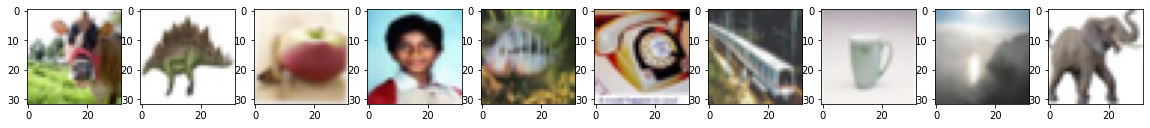

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [10]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [11]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [12]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [30]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.5e-3)
    
    batch_size = 500

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(30):
        print("epoch ", epoch)
        order = np.random.permutation(len(X_train))

        if epoch == 7:
            print("lr=1.0e-4")
            optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-4)
        
        if epoch == 12:
            print("lr=0.2e-4")
            optimizer = torch.optim.Adam(net.parameters(), lr=0.2e-4)


        for start_index in tqdm(range(0, len(X_train), batch_size)):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            X_batch

        net.eval()
        with torch.no_grad():
            test_preds = net.forward(X_test)
            loss_value = loss(test_preds, y_test).item()
            test_loss_history.append(loss_value)

            accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().item()
            test_accuracy_history.append(accuracy)
            #print(test_preds.argmax(dim=1))
            #print(y_test)

        print("accuracy = ", accuracy)
        print("\n\n")

    return test_accuracy_history, test_loss_history

accuracies = {}
losses = {}

In [28]:
from torchvision.models import resnet18
model = resnet18(pretrained=True)

In [31]:
accuracies['resnet18'], losses['resnet18'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 100/100 [00:06<00:00, 15.27it/s]


accuracy =  0.4666999876499176



epoch  1


100%|██████████| 100/100 [00:06<00:00, 15.25it/s]


accuracy =  0.48739999532699585



epoch  2


100%|██████████| 100/100 [00:06<00:00, 14.98it/s]


accuracy =  0.4756999909877777



epoch  3


100%|██████████| 100/100 [00:06<00:00, 14.64it/s]


accuracy =  0.49629998207092285



epoch  4


100%|██████████| 100/100 [00:07<00:00, 14.28it/s]


accuracy =  0.4967999756336212



epoch  5


100%|██████████| 100/100 [00:06<00:00, 14.75it/s]


accuracy =  0.49390000104904175



epoch  6


100%|██████████| 100/100 [00:06<00:00, 15.23it/s]


accuracy =  0.4894999861717224



epoch  7
lr=1.0e-4


100%|██████████| 100/100 [00:06<00:00, 15.33it/s]


accuracy =  0.5400999784469604



epoch  8


100%|██████████| 100/100 [00:06<00:00, 15.39it/s]


accuracy =  0.541700005531311



epoch  9


100%|██████████| 100/100 [00:06<00:00, 15.37it/s]


accuracy =  0.5444999933242798



epoch  10


100%|██████████| 100/100 [00:06<00:00, 15.39it/s]


accuracy =  0.5436999797821045



epoch  11


100%|██████████| 100/100 [00:06<00:00, 15.42it/s]


accuracy =  0.5464999675750732



epoch  12
lr=0.2e-4


100%|██████████| 100/100 [00:06<00:00, 15.35it/s]


accuracy =  0.5446000099182129



epoch  13


100%|██████████| 100/100 [00:06<00:00, 15.33it/s]


accuracy =  0.5442999601364136



epoch  14


100%|██████████| 100/100 [00:07<00:00, 13.87it/s]


accuracy =  0.54339998960495



epoch  15


100%|██████████| 100/100 [00:06<00:00, 14.99it/s]


accuracy =  0.5471999645233154



epoch  16


100%|██████████| 100/100 [00:06<00:00, 15.00it/s]


accuracy =  0.5471000075340271



epoch  17


100%|██████████| 100/100 [00:07<00:00, 14.11it/s]


accuracy =  0.5458999872207642



epoch  18


100%|██████████| 100/100 [00:06<00:00, 15.25it/s]


accuracy =  0.5465999841690063



epoch  19


100%|██████████| 100/100 [00:06<00:00, 15.29it/s]


accuracy =  0.5449999570846558



epoch  20


100%|██████████| 100/100 [00:06<00:00, 15.30it/s]


accuracy =  0.5462999939918518



epoch  21


100%|██████████| 100/100 [00:06<00:00, 15.31it/s]


accuracy =  0.5460000038146973



epoch  22


100%|██████████| 100/100 [00:06<00:00, 15.21it/s]


accuracy =  0.5485999584197998



epoch  23


100%|██████████| 100/100 [00:06<00:00, 14.62it/s]


accuracy =  0.5485999584197998



epoch  24


100%|██████████| 100/100 [00:06<00:00, 15.31it/s]


accuracy =  0.5464000105857849



epoch  25


100%|██████████| 100/100 [00:06<00:00, 15.31it/s]


accuracy =  0.5493000149726868



epoch  26


100%|██████████| 100/100 [00:06<00:00, 14.82it/s]


accuracy =  0.5489000082015991



epoch  27


100%|██████████| 100/100 [00:06<00:00, 15.35it/s]


accuracy =  0.5465999841690063



epoch  28


100%|██████████| 100/100 [00:06<00:00, 15.28it/s]


accuracy =  0.5500999689102173



epoch  29


100%|██████████| 100/100 [00:06<00:00, 15.30it/s]


accuracy =  0.5483999848365784





In [32]:
from torchvision.models import resnet50
model = resnet50(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [33]:
accuracies['resnet50'], losses['resnet50'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 100/100 [00:22<00:00,  4.44it/s]


accuracy =  0.47689998149871826



epoch  1


100%|██████████| 100/100 [00:22<00:00,  4.39it/s]


accuracy =  0.5512999892234802



epoch  2


100%|██████████| 100/100 [00:22<00:00,  4.49it/s]


accuracy =  0.558899998664856



epoch  3


100%|██████████| 100/100 [00:22<00:00,  4.49it/s]


accuracy =  0.5515999794006348



epoch  4


100%|██████████| 100/100 [00:22<00:00,  4.45it/s]


accuracy =  0.5595999956130981



epoch  5


100%|██████████| 100/100 [00:22<00:00,  4.43it/s]


accuracy =  0.5539999604225159



epoch  6


100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


accuracy =  0.5504999756813049



epoch  7
lr=1.0e-4


100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


accuracy =  0.6037999987602234



epoch  8


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6039999723434448



epoch  9


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6107000112533569



epoch  10


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6086999773979187



epoch  11


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6035999655723572



epoch  12
lr=0.2e-4


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6062999963760376



epoch  13


100%|██████████| 100/100 [00:22<00:00,  4.45it/s]


accuracy =  0.6074999570846558



epoch  14


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6065999865531921



epoch  15


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.60589998960495



epoch  16


100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


accuracy =  0.6074999570846558



epoch  17


100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


accuracy =  0.6075999736785889



epoch  18


100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


accuracy =  0.6098999977111816



epoch  19


100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


accuracy =  0.6078000068664551



epoch  20


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.606499969959259



epoch  21


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6078000068664551



epoch  22


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6068999767303467



epoch  23


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6083999872207642



epoch  24


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6092999577522278



epoch  25


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6089000105857849



epoch  26


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6083999872207642



epoch  27


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6068999767303467



epoch  28


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6060999631881714



epoch  29


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


accuracy =  0.6049000024795532





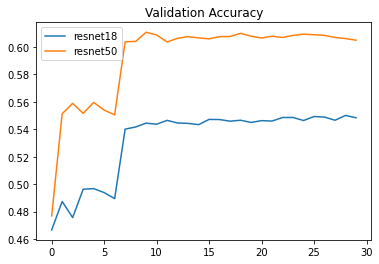

In [34]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
    plt.legend()
    plt.title('Validation Accuracy');

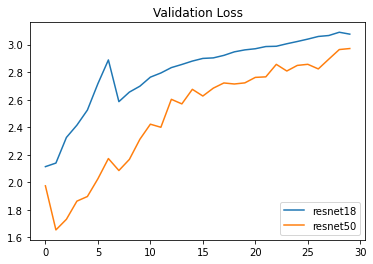

In [35]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
    plt.legend()
    plt.title('Validation Loss');